### Problem Set 8
### Dan Gamarnik

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

C:\Users\GamaD\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**(a)**

In [2]:
wine_df = pd.read_csv('strongdrink.txt')

<IPython.core.display.Javascript object>


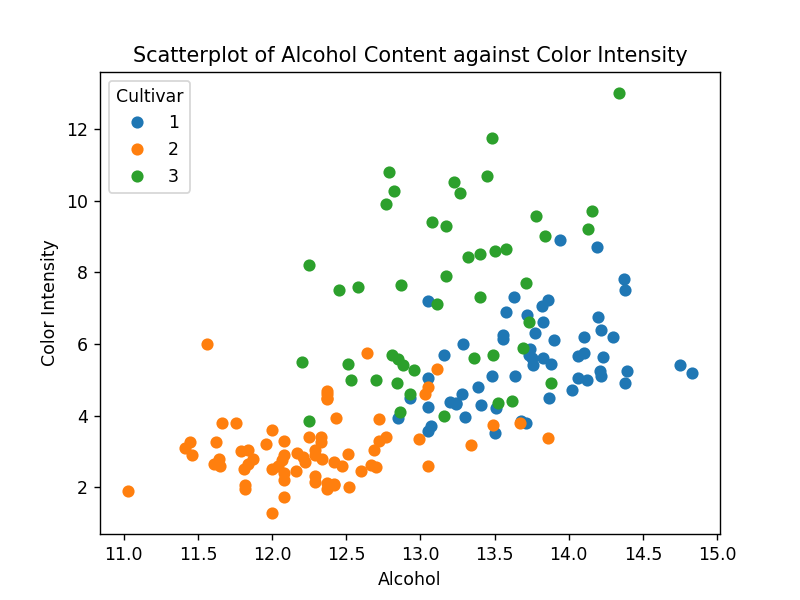

In [10]:

groups = wine_df.groupby('cultivar')

fig, ax = plt.subplots()
ax.set_title('Scatterplot of Alcohol Content against Color Intensity')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Color Intensity')
ax.margins(0.05) 

for name, group in groups:
    ax.plot(group.alco, group.color_int, marker='o', linestyle='', ms=6, label=name)
ax.legend(title='Cultivar', loc = "upper left")

plt.show()

**(b)**

In [4]:
k = 4
clf_mlog = KFold(n_splits=4, shuffle=True, random_state=112115)

In [5]:
Xvals = wine_df[['alco', 'malic', 'tot_phen', 'color_int']].values
# avoid conversion error 
yvals = wine_df[['cultivar']].values.ravel()
clf_mlog.get_n_splits(Xvals)

4

In [6]:
MSE_vec_kf = np.zeros(k)
ytests = np.array([])
ypreds = np.array([])
k_ind = int(0)
for train_index, test_index in clf_mlog.split(Xvals):
    print('Fold', k_ind)
    X_train, X_test = Xvals[train_index], Xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    ytests = np.append(ytests, y_test)
    # penalty is fixed
    MultLogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg', penalty = 'l2', C = .00009)
    MultLogReg.fit(X_train, y_train)
    y_pred = MultLogReg.predict(X_test)
    ypreds = np.append(ypreds, y_pred)
    MSE_vec_kf[k_ind] = ((y_test - y_pred) ** 2).mean()
    print(MSE_vec_kf[k_ind])
    print('')
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('K-fold MSE =', MSE_kf)
print('K-fold SD =', MSE_kf_std)

Fold 0
0.545454545455

Fold 1
0.613636363636

Fold 2
0.659090909091

Fold 3
0.568181818182

K-fold MSE = 0.596590909091
K-fold SD = 0.0436428735674


By adjusting the C parameter, I was able to find an MSE of **~0.5965 at C = 0.00009**. When C is increased to 0.0001, the MSE increases beyond 0.6, and lowering C below 0.00009 does not change the MSE.

**(c)**

In [7]:
MSE_loop = pd.DataFrame({"n_estimator" : np.zeros(5),
                         "min_sample_leaf" : np.zeros(5),
                         "max_depth" : np.zeros(5),
                         "MSE" : np.zeros(5)})
MSE_RF = MSE_loop[:0]

for ml in range(15):
    for md in range(15):
        for tree in range(5):
            RF = RandomForestClassifier(n_estimators = (tree * 50 + 50),
                                        min_samples_leaf = (ml * 5 + 5),
                                        max_depth = (md + 1), bootstrap=True, 
                                        oob_score=True, random_state=22)
            RF.fit(Xvals, yvals)
            MSE_loop["n_estimator"][tree] = tree * 50 + 50
            MSE_loop["max_depth"][tree] = md + 1
            MSE_loop["min_sample_leaf"][tree] = ml * 5 + 5
            MSE_loop["MSE"][tree] = 1 - RF.oob_score_
        MSE_RF = pd.concat([MSE_RF, MSE_loop])

MSE_comp = MSE_RF.sort_values(['MSE'])
MSE_comp.head(50)

,MSE,max_depth,min_sample_leaf,n_estimator
1,0.068182,5.0,10.0,100.0
1,0.068182,11.0,10.0,100.0
1,0.068182,9.0,10.0,100.0
1,0.068182,12.0,10.0,100.0
1,0.068182,8.0,10.0,100.0
1,0.068182,7.0,10.0,100.0
1,0.068182,10.0,10.0,100.0
1,0.068182,6.0,10.0,100.0
1,0.068182,13.0,10.0,100.0
1,0.068182,3.0,10.0,100.0


The lowest MSEs were returned by the top few sets of parameters **(~0.0682)**. While varying in max_depth, the **combination of min_sample_leaf = 10 and n_estimators = 100 seems to give the most optimal MSE values**.

**(d)**

In [8]:
MSE_vec_kf = np.zeros(k)
k_ind = int(0)
ytests = np.array([])
ypreds = np.array([])
# use previous splits
for train_index, test_index in clf_mlog.split(Xvals):
    print('Fold', k_ind)
    X_train, X_test = Xvals[train_index], Xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    ytests = np.append(ytests, y_test)
    svc = svm.SVC(kernel='rbf', gamma = 0.1, C=1.5)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    ypreds = np.append(ypreds, y_pred)
    MSE_vec_kf[k_ind] = ((y_test - y_pred) ** 2).mean()
    print(MSE_vec_kf[k_ind])
    print('')
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('K-Fold MSE =', MSE_kf)
print('K-Fold SD =', MSE_kf_std)

Fold 0
0.136363636364

Fold 1
0.181818181818

Fold 2
0.136363636364

Fold 3
0.0681818181818

K-Fold MSE = 0.130681818182
K-Fold SD = 0.0405762978894


The minimum MSE I was able to obtain was about **~0.1307**, using the parameters gamma = 0.1 and C = 1.5.

**(e)**

In [9]:
MSE_vec_kf = np.zeros(k)
ytests = np.array([])
ypreds = np.array([])
k_ind = int(0)
#use previous splits
for train_index, test_index in clf_mlog.split(Xvals):
    print('Fold', k_ind)
    X_train, X_test = Xvals[train_index], Xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    ytests = np.append(ytests, y_test)
    mlp = MLPClassifier(activation='relu', solver='lbfgs', alpha=5, hidden_layer_sizes=6)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    ypreds = np.append(ypreds, y_pred)
    MSE_vec_kf[k_ind] = ((y_test - y_pred) ** 2).mean()
    print(MSE_vec_kf[k_ind])
    print('')
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('K-Fold MSE =', MSE_kf)
print('K-Fold SD =', MSE_kf_std)

Fold 0
0.113636363636

Fold 1
0.136363636364

Fold 2
0.0681818181818

Fold 3
0.0681818181818

K-Fold MSE = 0.0965909090909
K-Fold SD = 0.0295235933108


The minimum MSE I managed to obtain from MLP was **~0.0739**, using ReLU, alpha = 5, and hidden_layer_sizes = 6. However, repeated runs of the MLP will produce slightly varying results.

**(f)**

Although the neural network produced the lowest MSE of all the above models, the output was not consistent. However, given that the above models in this case were trained on the same set of data, I would still conclude that MLP is likely to be the best predcitor.